In [4]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
import seaborn as sns
%matplotlib inline

class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

def get_data_simple_connect(data):
    return np.hstack((data,data))

def get_data_even_connect(data):
    return np.hstack((data,data[::-1]))

# 原点で点対称
def get_data_odd_connect(data):
    return np.hstack((data,data[::-1]*(-1)))

# ランチョス法を適用後に奇接続する場合
def get_data_odd_connect2(data):
    bias = data[0]
    data -= bias
    data_odd = get_data_odd_connect(data)
    data_odd += bias
    return data_odd

# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
#         result[i] = data[i] - ((right-left)*i/(points-1) + left)
        result[i] = data[i] - ((right-left)*i/(points-1))
    
    return result

# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

# 画像の用意

In [5]:
AIRPLANE   = ImageLoader("Mono/Airplane.bmp")
BARBARA    = ImageLoader("Mono/BARBARA.bmp")
BOAT       = ImageLoader("Mono/BOAT.bmp")
BRIDGE     = ImageLoader("Mono/BRIDGE.bmp")
BUILDING   = ImageLoader("Mono/Building.bmp")
CAMERAMAN  = ImageLoader("Mono/Cameraman.bmp")
GIRL       = ImageLoader("Mono/girl.bmp")
LAX        = ImageLoader("Mono/LAX.bmp")
LENNA      = ImageLoader("Mono/LENNA.bmp")
LIGHTHOUSE = ImageLoader("Mono/Lighthouse.bmp")
SIDBAtitle = ImageLoader("Mono/SIDBAtitle256.bmp")
TEXT       = ImageLoader("Mono/Text.bmp")
WOMAN      = ImageLoader("Mono/WOMAN.bmp")

In [6]:
Images = np.array(
    [
        AIRPLANE,BARBARA,BOAT,
        BRIDGE,BUILDING,CAMERAMAN,
        GIRL,LAX,LENNA,
        LIGHTHOUSE,SIDBAtitle,TEXT,
        WOMAN
    ]
)

# 信号の用意

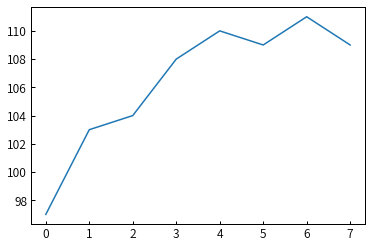

In [16]:
N = 16
data = LENNA.get_points(N//2)
plt.plot(data)
# plt.savefig('output/output_15.png',dpi=300)

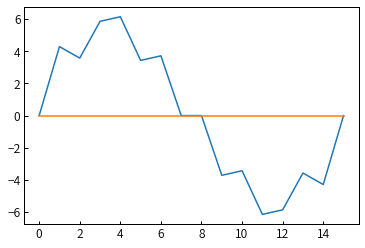

In [17]:
data_lanczos = Lanczos(data)
data_odd = get_data_odd_connect2(data_lanczos)
plt.plot(data_odd - data_odd[0])
plt.plot(np.linspace(0,0,16))
plt.savefig('output/output_18.png',dpi=300)

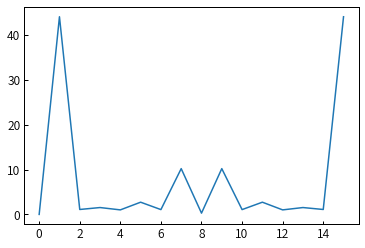

In [21]:
F_o = np.fft.fft(data_odd-data_odd[0])
plt.plot(np.abs(F_o))

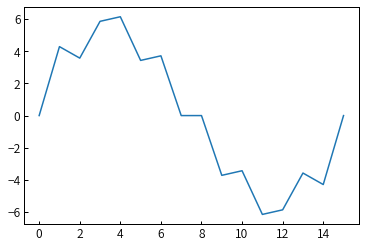

In [20]:
plt.plot(np.fft.ifft(F_o))

In [27]:
print(F_o.real)

[  0.           8.59734664   0.4213925   -0.85082342   0.71428571
   2.26503698  -0.99282107 -10.0115602   -0.28571429 -10.0115602
  -0.99282107   2.26503698   0.71428571  -0.85082342   0.4213925
   8.59734664]


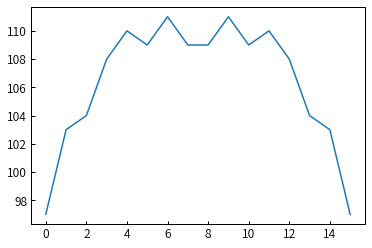

In [28]:
data_even = get_data_even_connect(data)
plt.plot(data_even)

In [29]:
F_e = np.fft.fft(data_even)
print(F_e.imag)

[  0.          -8.42369267  -8.19238816  -2.66878818  -3.
  -2.42614749 -10.19238816  -0.18105198   0.           0.18105198
  10.19238816   2.42614749   3.           2.66878818   8.19238816
   8.42369267]
